In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.cm import get_cmap

In [2]:
cols = ['date', 'N', 'emo_1', 'emo_2', 'sadness_agg_score', 'sadness_retweet', 'joy_agg_score', 'joy_retweet']
cols += ['fear_agg_score', 'fear_retweet', 'anger_agg_score', 'anger_retweet', 'disgust_agg_score', 'disgust_retweet']

In [3]:
df = pd.read_csv('agg_result.csv', names=cols)

In [4]:
df.sort_values(by='date', inplace=True)
df.date = df.date.apply(lambda x: x[:10])
df['month'] = df.date.apply(lambda x: int(x[6]))
df.head()

,date,N,emo_1,emo_2,sadness_agg_score,sadness_retweet,joy_agg_score,joy_retweet,fear_agg_score,fear_retweet,anger_agg_score,anger_retweet,disgust_agg_score,disgust_retweet,month
0,2020-03-11,495,sadness,joy,0.301000,1090.0,0.185863,221.5,0.194251,56.5,0.186017,191.0,0.166307,76.0,3
1,2020-03-12,497,sadness,joy,0.291971,1022.0,0.221183,185.5,0.176839,182.0,0.170949,90.5,0.148856,53.0,3
2,2020-03-13,500,sadness,joy,0.289830,631.0,0.217678,190.0,0.167694,47.5,0.179598,35.5,0.164661,42.5,3
3,2020-03-14,498,sadness,joy,0.288677,50918.0,0.224423,25200.5,0.165550,82.5,0.178777,47.5,0.157221,128.5,3
4,2020-03-15,497,sadness,joy,0.304332,642.0,0.213769,174.5,0.184691,74.5,0.162124,45.0,0.154861,27.0,3


In [5]:
df.N.sum()

36727

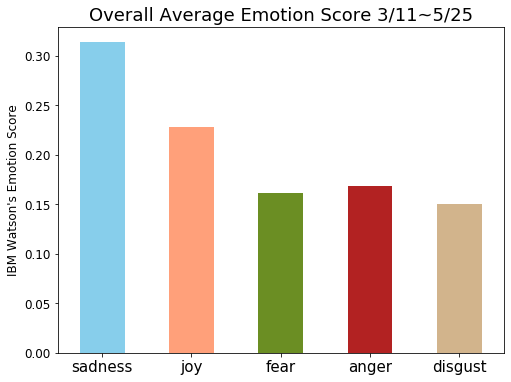

In [6]:
df_total = df[['sadness_agg_score','joy_agg_score', 'fear_agg_score', 'anger_agg_score', 'disgust_agg_score']].mean()
idx = {'sadness_agg_score':'sadness', 'joy_agg_score':'joy', 'fear_agg_score':'fear', 'anger_agg_score': 'anger', 'disgust_agg_score':'disgust'}
df_total.rename(index=idx, inplace=True)
df_total.plot(kind='bar', color=['skyblue','lightsalmon','olivedrab', 'firebrick', 'tan'], figsize=(8,6), fontsize=12)
plt.xticks(rotation=0, fontsize=15)
plt.title('Overall Average Emotion Score 3/11~5/25', fontsize=18)
plt.ylabel("IBM Watson's Emotion Score", fontsize=12);

In [7]:
df_m = df.groupby('month')[['sadness_agg_score','joy_agg_score', 'fear_agg_score', 'anger_agg_score', 'disgust_agg_score']].mean()

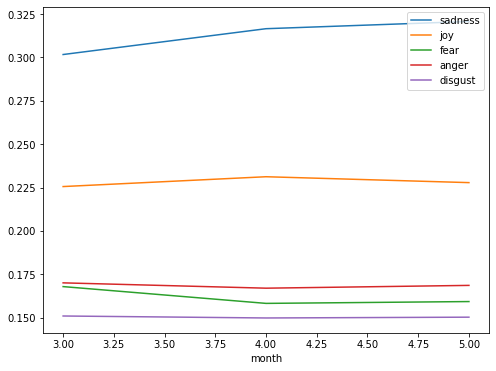

In [12]:
df_m.rename(columns=idx, inplace=True)
df_m.plot(figsize=(8,6));

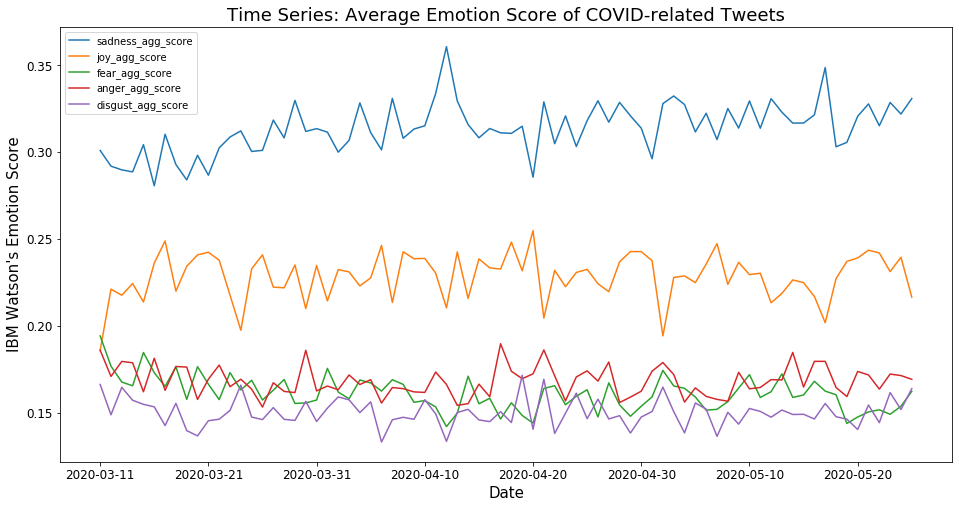

In [8]:
y_cols = ['sadness_agg_score','joy_agg_score', 'fear_agg_score', 'anger_agg_score', 'disgust_agg_score']
df.plot(x='date', y=y_cols, figsize=(16,8), fontsize=12)
plt.xlabel('Date', fontsize=15)
plt.ylabel("IBM Watson's Emotion Score", fontsize=15)
plt.title('Time Series: Average Emotion Score of COVID-related Tweets', fontsize=18);

In [9]:
df.N.sum()

36727

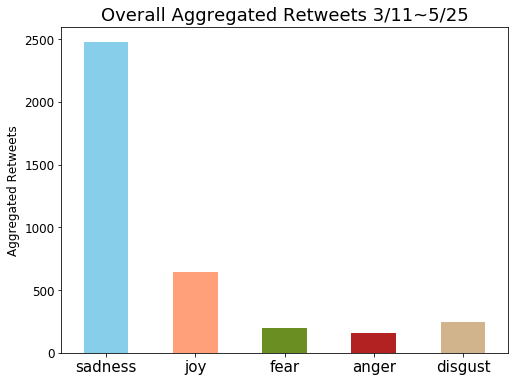

In [14]:
df_retweet = df[['sadness_retweet','joy_retweet', 'fear_retweet', 'anger_retweet', 'disgust_retweet']].mean()
idx = {'sadness_retweet':'sadness', 'joy_retweet':'joy', 'fear_retweet':'fear', 'anger_retweet': 'anger', 'disgust_retweet':'disgust'}
df_retweet.rename(index=idx, inplace=True)
df_retweet.plot(kind='bar', color=['skyblue','lightsalmon','olivedrab', 'firebrick', 'tan'], figsize=(8,6), fontsize=12)
plt.xticks(rotation=0, fontsize=15)
plt.title('Overall Aggregated Retweets 3/11~5/25', fontsize=18)
plt.ylabel("Aggregated Retweets", fontsize=12);